## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

### Create a data schema programatically

In [4]:
from pyspark.sql.types import *

In [5]:
data_schema = '''
    id INT, gender STRING, age DOUBLE, hypertension INT, heart_disease INT, ever_married STRING,
    work_type String, Residence_type String, avg_glucose_level DOUBLE, bmi DOUBLE, 
    smoking_status STRING, stroke INT
'''

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [6]:
df = spark.read.format('csv').schema(data_schema)\
                .option('header', 'True').load('healthcare-dataset-stroke-data.csv')

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

##### Print the Schema.

In [7]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



##### Show the first 10 rows from the data.

In [8]:
df.show(10, truncate=True)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

##### Explore null values and show how many null values in each column.

In [9]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



###### Plot a count plot for the target label and notice the graph

In [10]:
import seaborn as sns

In [11]:
pd_df = df.toPandas()

In [12]:
pd_df.shape

(5110, 12)

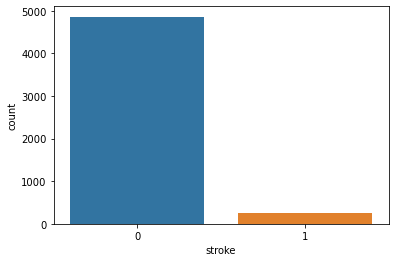

In [13]:
sns.countplot(data=pd_df ,x='stroke');

In [14]:
# Data is inbalace and need to be downsample

##### Perform any additional EDA you find useful

In [15]:
describtion_df = df.describe()
describtion_df.select(['summary'] + [round(c, 2).alias(c) for c in describtion_df.columns if c!='summary']).show()

+-------+--------+------+------+------------+-------------+------------+---------+--------------+-----------------+------+--------------+------+
|summary|      id|gender|   age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|   bmi|smoking_status|stroke|
+-------+--------+------+------+------------+-------------+------------+---------+--------------+-----------------+------+--------------+------+
|  count|  5110.0|5110.0|5110.0|      5110.0|       5110.0|      5110.0|   5110.0|        5110.0|           5110.0|4909.0|        5110.0|5110.0|
|   mean|36517.83|  null| 43.23|         0.1|         0.05|        null|     null|          null|           106.15| 28.89|          null|  0.05|
| stddev|21161.72|  null| 22.61|         0.3|         0.23|        null|     null|          null|            45.28|  7.85|          null|  0.22|
|    min|    67.0|  null|  0.08|         0.0|          0.0|        null|     null|          null|            55.12|  10.3|        

In [16]:
pd_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
# ID is not an effective feature, it must be dropped

In [18]:
df.groupby('gender').agg(count(col('stroke'))).show()

+------+-------------+
|gender|count(stroke)|
+------+-------------+
|Female|         2994|
| Other|            1|
|  Male|         2115|
+------+-------------+



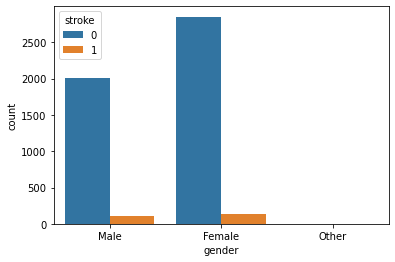

In [19]:
sns.countplot(data=pd_df ,x='gender', hue='stroke');

In [20]:
df.groupby('ever_married').agg(count(col('stroke'))).show()

+------------+-------------+
|ever_married|count(stroke)|
+------------+-------------+
|          No|         1757|
|         Yes|         3353|
+------------+-------------+



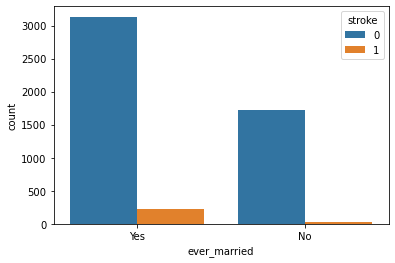

In [21]:
sns.countplot(data=pd_df ,x='ever_married', hue='stroke');

In [22]:
df.groupby('work_type').agg(count(col('stroke'))).show()

+-------------+-------------+
|    work_type|count(stroke)|
+-------------+-------------+
| Never_worked|           22|
|Self-employed|          819|
|      Private|         2925|
|     children|          687|
|     Govt_job|          657|
+-------------+-------------+



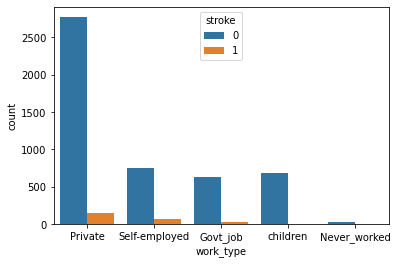

In [23]:
sns.countplot(data=pd_df ,x='work_type', hue='stroke');

In [24]:
# work_type is as important feature

In [25]:
df.groupby('Residence_type').agg(count(col('stroke'))).show()

+--------------+-------------+
|Residence_type|count(stroke)|
+--------------+-------------+
|         Urban|         2596|
|         Rural|         2514|
+--------------+-------------+



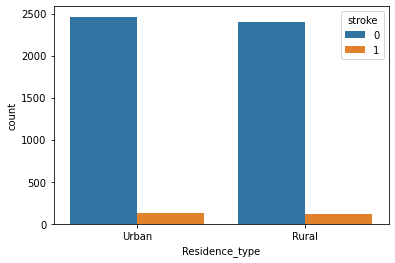

In [26]:
sns.countplot(data=pd_df ,x='Residence_type', hue='stroke');

In [27]:
df.groupby('smoking_status').agg(count(col('stroke'))).show()

+---------------+-------------+
| smoking_status|count(stroke)|
+---------------+-------------+
|         smokes|          789|
|        Unknown|         1544|
|   never smoked|         1892|
|formerly smoked|          885|
+---------------+-------------+



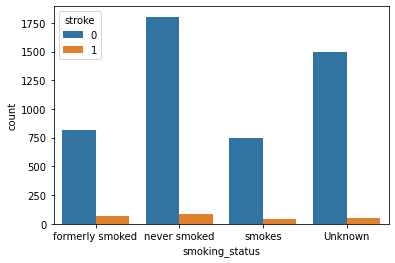

In [28]:
sns.countplot(data=pd_df ,x='smoking_status', hue='stroke');

In [29]:
# smoking_status is as important feature

In [30]:
import numpy as np

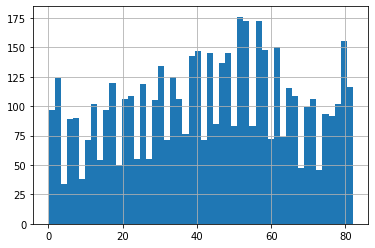

In [31]:
pd_df['age'].hist(bins=50);

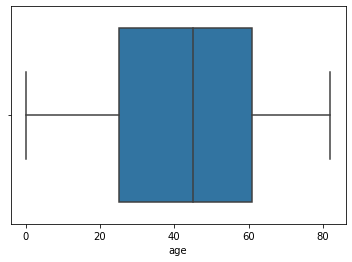

In [32]:
sns.boxplot(data=pd_df, x='age');

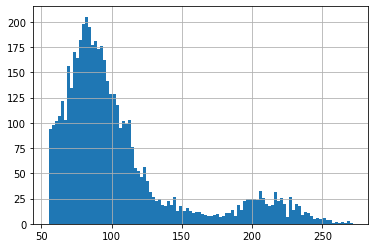

In [33]:
pd_df['avg_glucose_level'].hist(bins=100);

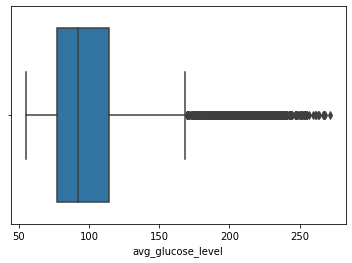

In [34]:
sns.boxplot(data=pd_df, x='avg_glucose_level');

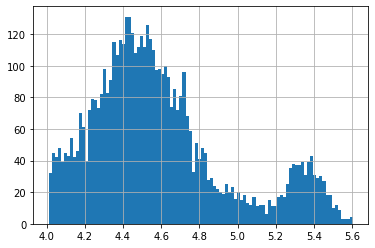

In [35]:
np.log(pd_df['avg_glucose_level']).hist(bins=100);

In [36]:
pd_df['Log_avg_glucose_level'] = np.log(pd_df['avg_glucose_level'])

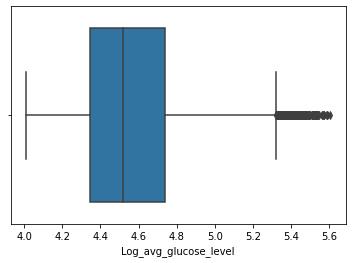

In [37]:
sns.boxplot(data=pd_df, x='Log_avg_glucose_level');

In [38]:
pd_df['leveled_avg_glucose'] = (pd_df['avg_glucose_level'] / 50).astype(int)
pd_df['leveled_avg_glucose'].value_counts()

1    3131
2    1248
4     409
3     297
5      25
Name: leveled_avg_glucose, dtype: int64

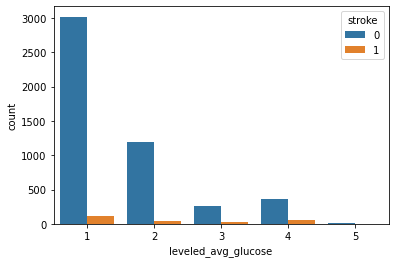

In [39]:
sns.countplot(data=pd_df ,x='leveled_avg_glucose', hue='stroke');

In [40]:
# avg_glucose_level can be leveled or scaled

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [41]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [42]:
df = df.filter(col('age') >= 2)
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [43]:
df.select('gender', 'smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [44]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [45]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [46]:
df = df.withColumn('gender', \
              when((col('gender')=='Male'), 1)\
              .when((col('gender')=='Female'), 0)\
              .otherwise(0))

In [47]:
df.groupby('gender').agg(count('gender')).show()

+------+-------------+
|gender|count(gender)|
+------+-------------+
|     1|         2052|
|     0|         2938|
+------+-------------+



In [48]:
df = df.withColumn('smoking_status', \
              when((col('smoking_status')=='never smoked'), 0)\
              .when((col('smoking_status')=='Unknown'), 0.5)\
              .when((col('smoking_status')=='formerly smoked'), 0.75)\
              .otherwise(1))

In [49]:
df.groupby('smoking_status').agg(count('smoking_status')).show()

+--------------+---------------------+
|smoking_status|count(smoking_status)|
+--------------+---------------------+
|           0.0|                 1892|
|           1.0|                  789|
|           0.5|                 1424|
|          0.75|                  885|
+--------------+---------------------+



#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [50]:
df.select('gender', 'smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [51]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [52]:
df.select('*').count()

4990

In [53]:
df = df.na.drop()

In [54]:
df.select('*').count()

4795

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [55]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=0.42)

In [ ]:
train_df.write.parquet("train_df.parquet")
test_df.write.parquet("test_df.parquet")

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
train_df =spark.read.parquet("train_df.parquet")
test_df =spark.read.parquet("test_df.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [57]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [58]:
categoricalColumns = [ col for (col, dtype) in train_df.dtypes
                       if (dtype == "string")]
categoricalColumns  

['ever_married', 'work_type', 'Residence_type']

In [59]:
indexOutputColumns = [ x + "_Index" for x in categoricalColumns]
indexOutputColumns

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [60]:
oheOutputColumns = [x + "_OHE" for x in categoricalColumns]
oheOutputColumns

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [61]:
numericColumns = [ field for (field,dataType) in train_df.dtypes
                   if ((dataType != 'string') & (field != 'stroke') & ((field != 'id'))) ]
numericColumns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [62]:
assemblerInputs = oheOutputColumns + numericColumns
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [63]:
stringIndexer = StringIndexer(inputCols=categoricalColumns,
                              outputCols=indexOutputColumns,)

In [64]:
oheEncoder = OneHotEncoder(inputCols=indexOutputColumns,
                          outputCols=oheOutputColumns)

In [65]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

##### Model

In [66]:
from pyspark.ml.classification import LogisticRegression

In [67]:
log_reg = LogisticRegression(featuresCol='features', labelCol='stroke', predictionCol='prediction')

##### Pipeline

In [68]:
from pyspark.ml import Pipeline

In [69]:
pipeline = Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,log_reg])

##### Training

In [70]:
pipelineModel = pipeline.fit(train_df)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

##### Test

In [71]:
pred = pipelineModel.transform(test_df)

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [72]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [73]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [74]:
evaluatorROC.evaluate(pred)

0.49947423764458465

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [75]:
weight_map = { 0 : ( 1 - ( df.select('stroke').where('stroke=0').count()/df.count())),
               1 : ( 1 - ( df.select('stroke').where('stroke=1').count()/df.count()))}

weight_map

{0: 0.04358706986444216, 1: 0.9564129301355578}

In [76]:
def weights(w):
    return float(weight_map[w])

In [77]:
udf_function = udf(lambda x: weights(x))

In [78]:
df = df.withColumn('weightCol', udf_function(col('stroke')))

In [79]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=0.42)

In [80]:
train_df = train_df.withColumn("weightCol", train_df["weightCol"].cast(DoubleType()))

In [81]:
test_df = test_df.withColumn("weightCol", test_df["weightCol"].cast(DoubleType()))

In [82]:
log_reg2 = LogisticRegression(featuresCol='features', labelCol='stroke', weightCol='weightCol')

In [83]:
pipeline2 = Pipeline( stages = [stringIndexer, oheEncoder, vecAssembler, log_reg2])

In [84]:
pipelineModel2 = pipeline2.fit(train_df)

In [85]:
pred_W = pipelineModel2.transform(test_df)

In [86]:
evaluatorROC2 = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [87]:
evaluatorROC2.evaluate(pred_W)

0.736198738170347